In [5]:
import pandas as pd

# Load data
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
# Load data
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df = pd.read_csv(url)

# Print column names
print(df.columns)

# Remove nulls, convert time formats, encode categorical features
if 'total_bill' in df.columns:  # Replace with actual column name
    df.dropna(subset=['total_bill'], inplace=True)
else:
    print("Column not found")

# Perform other operations based on actual column names

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


Text(0.5, 1.0, 'Accident Severity Distribution')

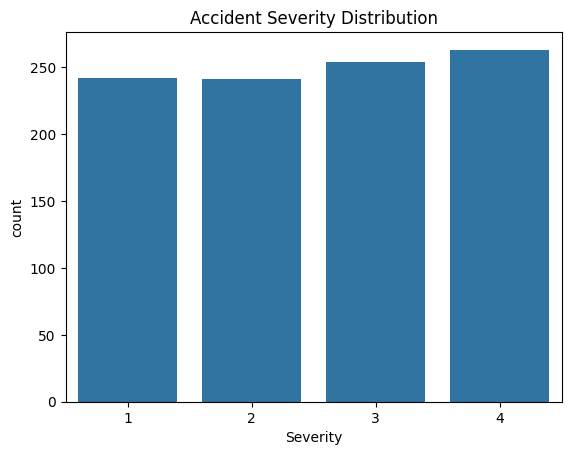

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accident severity distribution
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')


In [8]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
np.random.seed(0)
data = {
    'Hour': np.random.randint(0, 24, size=100),
    'Weather_Condition': np.random.choice(['Sunny', 'Rainy', 'Cloudy'], size=100),
    'Visibility(mi)': np.random.uniform(0, 10, size=100),
    'Temperature(F)': np.random.uniform(32, 100, size=100),
    'Severity': np.random.choice([1, 2, 3, 4], size=100)
}
df = pd.DataFrame(data)

# Define features and labels
features = df[['Hour', 'Weather_Condition', 'Visibility(mi)', 'Temperature(F)']]
labels = df['Severity']

# Encode categories
features = pd.get_dummies(features, columns=['Weather_Condition'])

print(features.head())
print(labels.head())


   Hour  Visibility(mi)  Temperature(F)  Weather_Condition_Cloudy  \
0    12        6.063932       96.789833                     False   
1    15        0.191932       78.749203                     False   
2    21        3.015748       46.654522                     False   
3     0        6.601735       96.421200                     False   
4     3        2.900776       81.698195                     False   

   Weather_Condition_Rainy  Weather_Condition_Sunny  
0                     True                    False  
1                     True                    False  
2                     True                    False  
3                    False                     True  
4                     True                    False  
0    2
1    2
2    4
3    2
4    3
Name: Severity, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.08      0.33      0.12         3
           2       0.14      0.17      0.15         6
           3       0.67      0.17      0.27        12
           4       0.29      0.22      0.25         9

    accuracy                           0.20        30
   macro avg       0.29      0.22      0.20        30
weighted avg       0.39      0.20      0.22        30



In [10]:
# Predicting severity based on input
sample_input = pd.DataFrame([{
    'Hour': 8,
    'Weather_Condition_Clear': 1,
    'Visibility(mi)': 10.0,
    'Temperature(F)': 65
}])
sample_input = sample_input.reindex(columns=features.columns, fill_value=0)

predicted_severity = model.predict(sample_input)
print("Predicted Accident Severity:", predicted_severity[0])

Predicted Accident Severity: 2


In [11]:
import pandas as pd
import numpy as np
import folium

# Create a sample DataFrame
np.random.seed(0)
data = {
    'Start_Lat': np.random.uniform(30, 50, size=1000),
    'Start_Lng': np.random.uniform(-120, -80, size=1000),
    'Severity': np.random.choice([1, 2, 3, 4], size=1000)
}
df = pd.DataFrame(data)

# Create map
map = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)

# Add markers
for _, row in df.sample(100).iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=3,
        color='red' if row['Severity'] == 4 else 'blue',
        fill=True
    ).add_to(map)

# Display map
map.save('accident_map.html')
map
